In [31]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from evaluate import load as load_metric
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text

In [35]:
df = pd.read_csv("data/twcs.csv")

# 60 row manual labels ive done
# manual_lables = pd.read_csv("labels/labeled_sample_.csv") 实际文件没有label column！

df = df.merge(manual_lables[['text', 'label']], on="text", how="inner")

# TODO: 清洗步骤：图标反应出有大量的无意义词语，必须清洗！！！！！！！！！！

# Clean step
import re
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"http\S+", "", txt)        # remove URLs
    txt = re.sub(r"@\w+", "", txt)            # remove @handles
    txt = re.sub(r"[^a-z\s]", " ", txt)       # keep only letters and spaces
    txt = re.sub(r"\s+", " ", txt).strip()     # collapse multiple spaces
    return txt

df['clean_text'] = df['text'].astype(str).apply(clean_text)
df = df.dropna(subset=['label'])


In [36]:
stop_words = text.ENGLISH_STOP_WORDS.copy()

additional_stop_words = ['rt', 'https', 'co', 'my', 'i', 'the', 'to', 'and', 'is', 'for', 'you', 'but', 'we', 'that', 'this']
stop_words = stop_words.union(additional_stop_words)

tfidf = TfidfVectorizer(
    lowercase=True,
    token_pattern=r"(?u)\b\w+\b",
    max_features=1000
)

X = tfidf.fit_transform(df['clean_text'])
feature_names = np.array(tfidf.get_feature_names_out())

In [37]:
X_df = pd.DataFrame(X.toarray(), columns=feature_names)
X_df['label'] = df['label'].values

mean_tfidf = X_df.groupby('label').mean()

mean_tfidf.loc['technical'].head()

a               0.040185
able            0.054831
about           0.020804
access          0.000000
accidentally    0.000000
Name: technical, dtype: float64

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


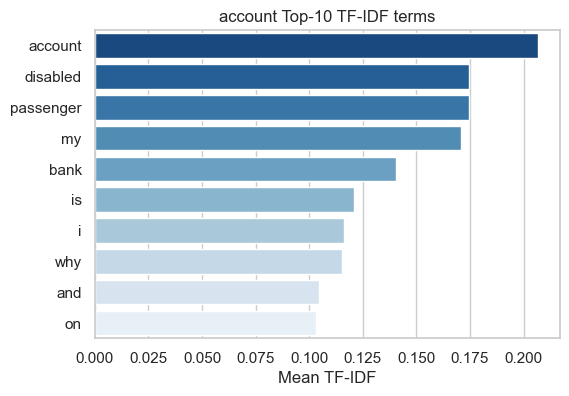

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


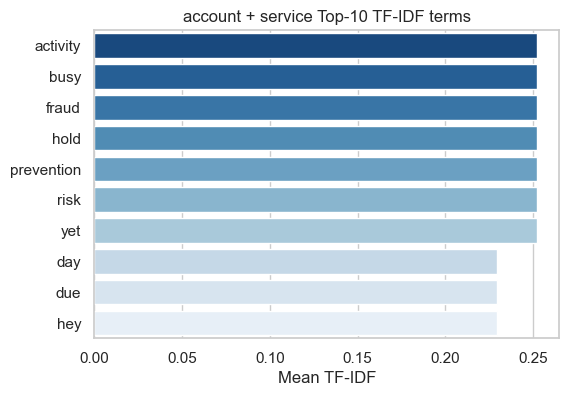

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


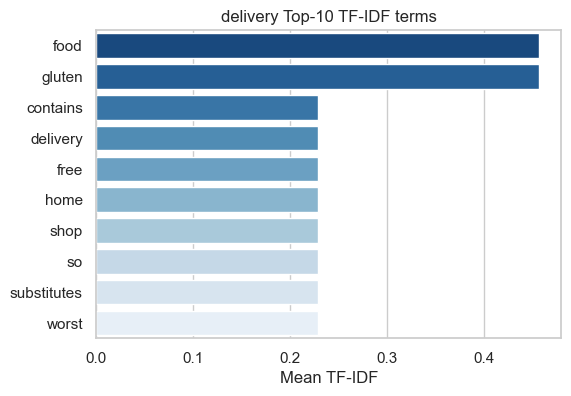

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


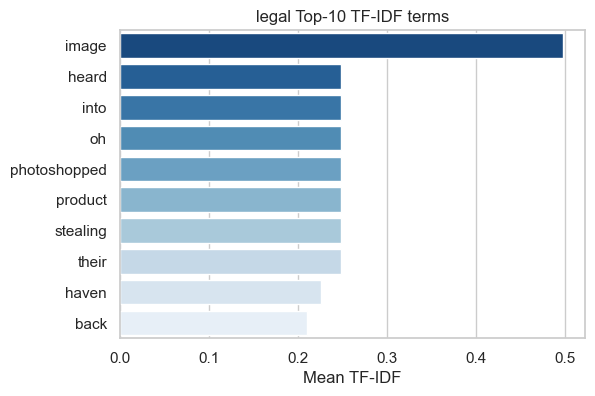

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


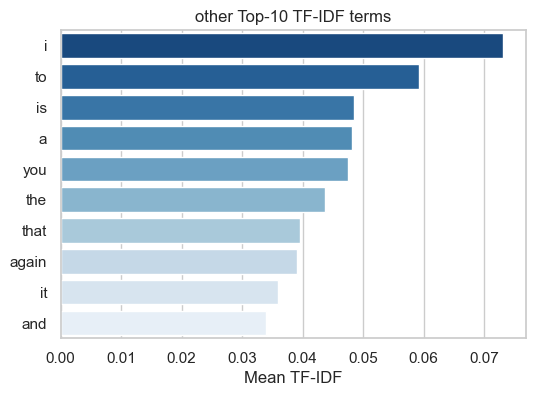

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


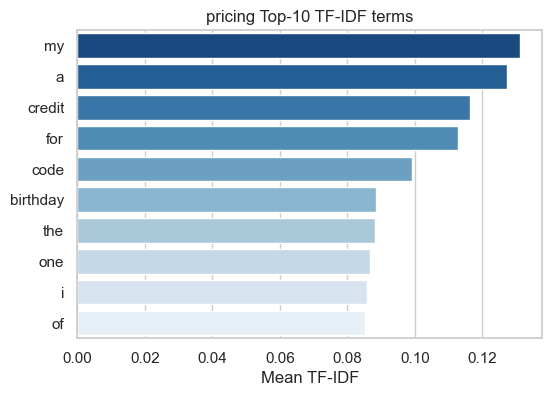

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


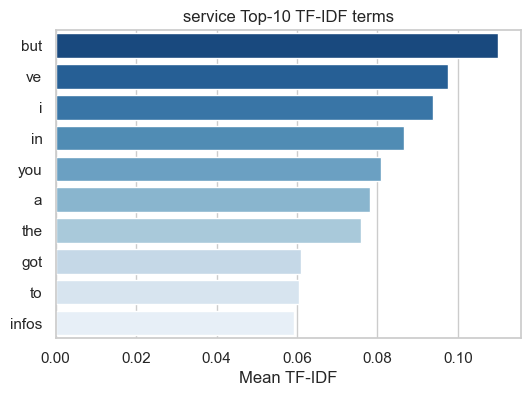

/var/folders/yj/h7kmf_d53bbcgzkk3bl4tch00000gn/T/ipykernel_7595/2409655973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")


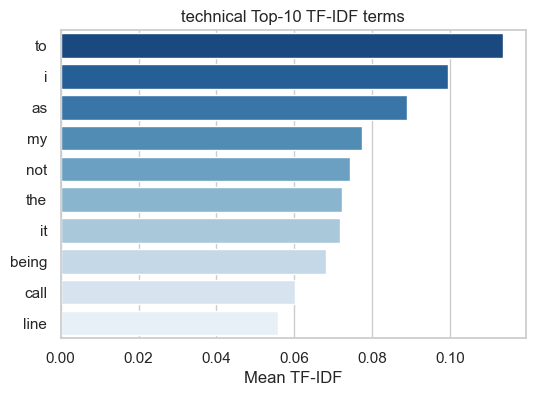

In [38]:
labels = mean_tfidf.index.tolist()

# Use seaborn
# seaborn styles: white, dark, whitegrid, darkgrid, ticks
sns.set_theme(style="whitegrid")  # correct seaborn API

for lbl in labels:
    row = mean_tfidf.loc[lbl]
    top10 = row.nlargest(10)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=top10.values, y=top10.index, palette="Blues_r")
    plt.title(f"{lbl} Top-10 TF-IDF terms")
    plt.xlabel("Mean TF-IDF")
    plt.ylabel("")
    plt.show()

# n_labels = len(labels)
# fig, axes = plt.subplots(n_labels, 1, figsize=(8, 4 * n_labels))
#
# for ax, lbl in zip(axes, labels):
#     # 取该标签行中值最大的 10 个特征
#     row = mean_tfidf.loc[lbl]
#     top10 = row.nlargest(10)
#     # 横向条形图（倒序显示）
#     ax.barh(top10.index[::-1], top10.values[::-1])
#     ax.set_title(f"Label = {lbl} 的 Top 10 关键词")
#     ax.set_xlabel("Mean TF-IDF")
#     ax.tick_params(axis='y', labelsize=10)
# plt.tight_layout()
# plt.show()


/Users/liusiying/Desktop/learn/Programming/PyCharm/ecommerce-risk-nlp/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liusiying/Desktop/learn/Programming/PyCharm/ecommerce-risk-nlp/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liusiying/Desktop/learn/Programming/PyCharm/ecommerce-risk-nlp/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liusiying/Desktop/learn/Programming/PyCharm/ecommerce-risk-nlp/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing fr

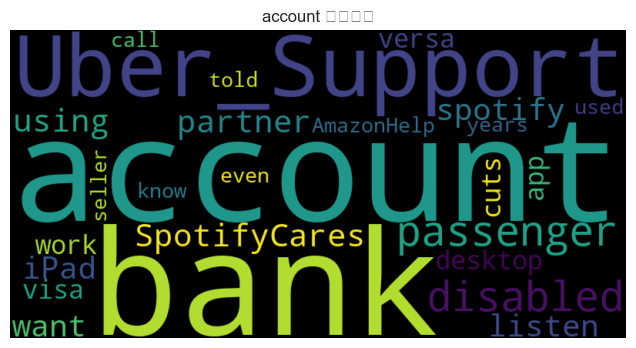

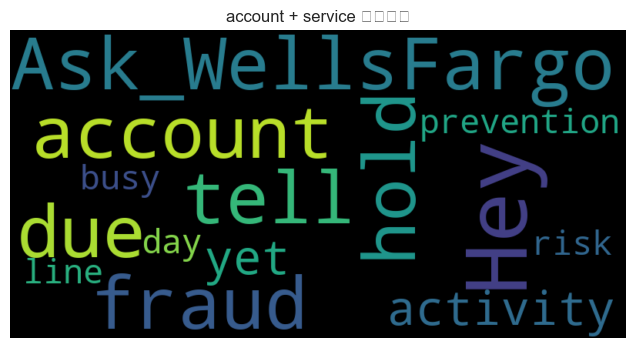

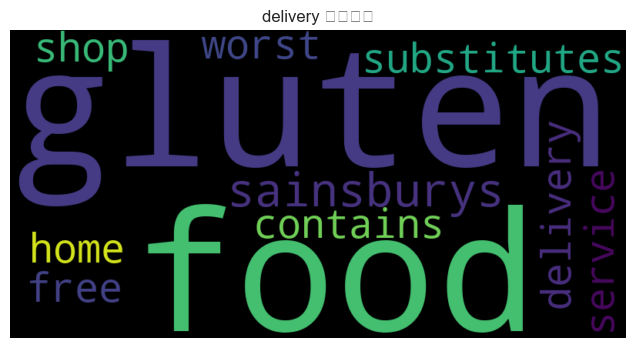

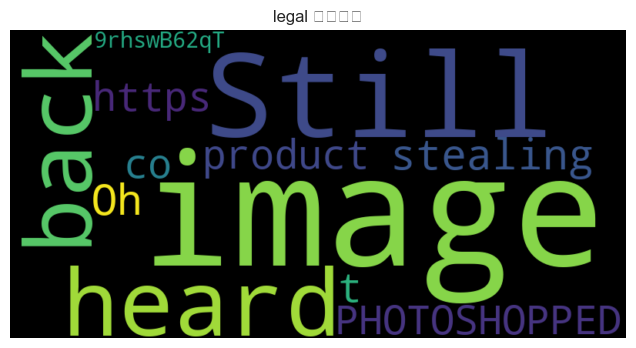

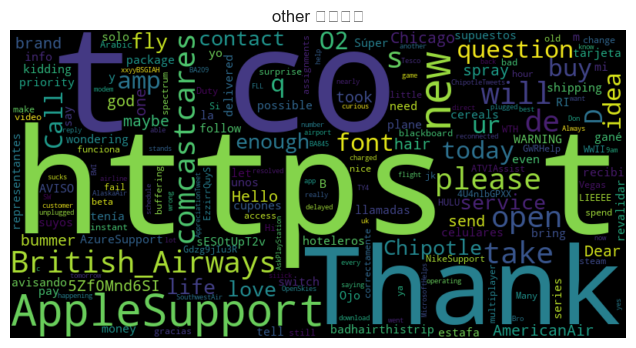

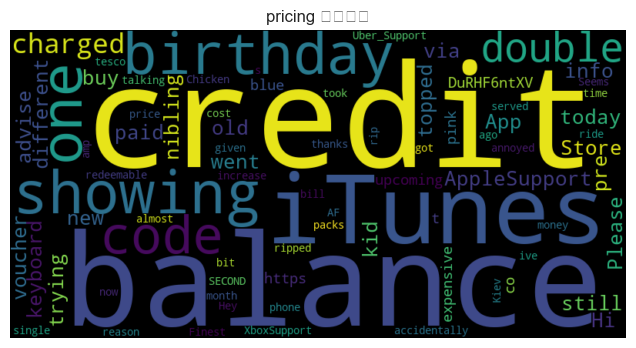

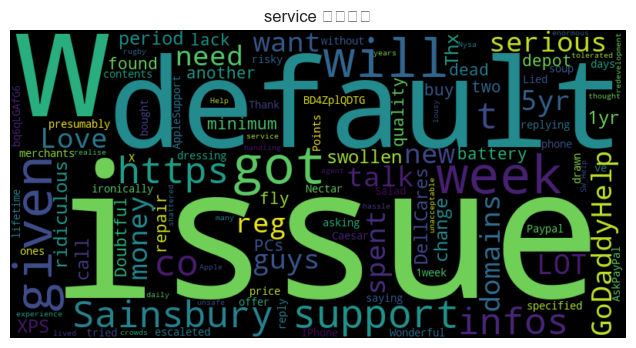

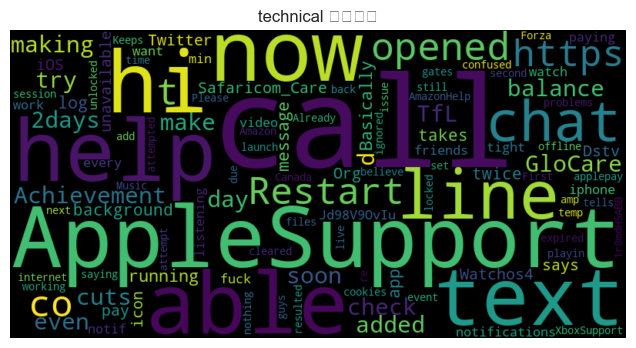

In [39]:
from wordcloud import WordCloud

for lbl in labels:
    text = " ".join(df[df['label']==lbl]['text'])
    wc = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{lbl} 标签词云")
    plt.show()